<a href="https://colab.research.google.com/github/shrut9/ecommerce_transaction_dataset/blob/main/FirstName_LastName_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('/content/Customers.csv')
transactions = pd.read_csv('/content/Transactions.csv')

Data preprocessing & Feature Engineering


In [3]:
data = pd.merge(customers, transactions, on='CustomerID')

In [4]:
data['TotalSpend'] = data.groupby('CustomerID')['TotalValue'].transform('sum')
data['TransactionCount'] = data.groupby('CustomerID')['TransactionID'].transform('count')
data['AverageSpend'] = data['TotalSpend'] / data['TransactionCount']

In [5]:
features = data[['CustomerID', 'Region']].drop_duplicates()
features = features.merge(data.groupby('CustomerID').agg({
    'TotalSpend': 'max',
    'TransactionCount': 'max',
    'AverageSpend': 'max'
}).reset_index(), on='CustomerID')

In [6]:
features = pd.get_dummies(features, columns=['Region'], drop_first=True)


In [7]:
features = features.drop('CustomerID', axis=1)

In [9]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

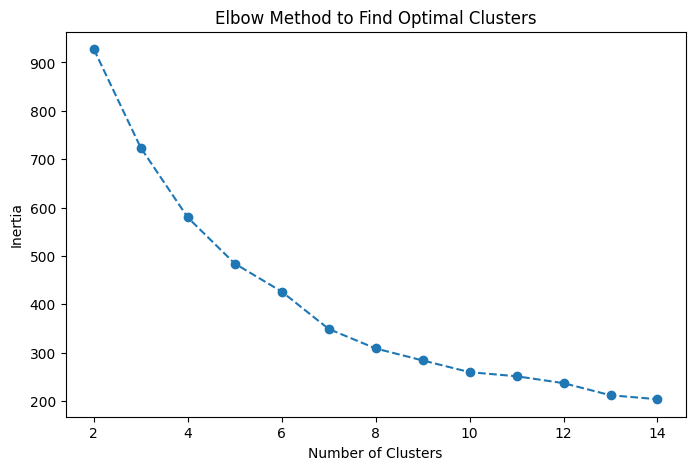

In [27]:
# Elbow method to determine optimal number of clusters
inertia = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(2, 15), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal Clusters')
plt.show()

In [62]:
optimal_clusters = 7 # Choose based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [63]:
features['Cluster'] = clusters

In [64]:
db_index = davies_bouldin_score(scaled_features, clusters)
silhouette_avg = silhouette_score(scaled_features, clusters)

print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

Davies-Bouldin Index: 0.9722437671869785
Silhouette Score: 0.36769938175301686


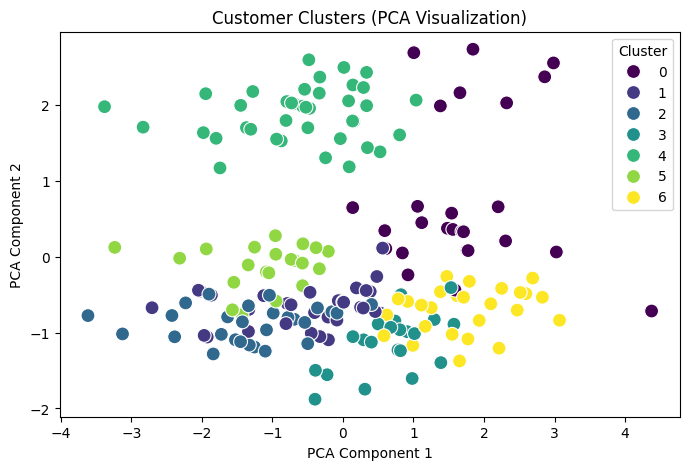

In [65]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=clusters, palette='viridis', s=100)
plt.title('Customer Clusters (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


In [66]:
features.to_csv('Clustering_Results.csv', index=False)

In [67]:
from google.colab import files


files.download('Clustering_Results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>